In [ ]:
import tensorflow as tf

# In TensorFlow 2.x, eager execution is enabled by default, so no need for tf.enable_eager_execution()
print("Eager execution is enabled:", tf.executing_eagerly())
!pip install stable_baselines3




Eager execution is enabled: True
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.3 MB/s eta 0:00:00
  Attempt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install gym_anytrading

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Ensure compatibility with Stable-Baselines3
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import gymnasium as gym
import gym_anytrading
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
# Load dataset
df = pd.read_csv(r"/content/combined_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,"1,002.33","1,005.06",967.98,974.82,"596,562"
2021-03-10,"1,007.80","1,009.96",989.18,994.44,"498,398"
2021-03-09,"1,002.78","1,009.48",978.26,998.31,"624,570"
2021-03-08,989.79,"1,016.91",988.86,998.43,"750,096"
2021-03-05,988.20,"1,008.48",982.27,993.00,"860,894"


In [ ]:
import pandas as pd

file_path = r'/content/combined_dataset.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Print the column names to debug
print("Column names in the CSV:", df.columns)


Column names in the CSV: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Removes leading/trailing spaces


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
Open,object
High,object
Low,object
Close,object
Volume,object


In [ ]:
df.size

7422

In [ ]:
df.set_index('Date', inplace=True)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,"1,002.33","1,005.06",967.98,974.82,"596,562"
2021-03-10,"1,007.80","1,009.96",989.18,994.44,"498,398"
2021-03-09,"1,002.78","1,009.48",978.26,998.31,"624,570"
2021-03-08,989.79,"1,016.91",988.86,998.43,"750,096"
2021-03-05,988.20,"1,008.48",982.27,993.00,"860,894"


In [ ]:
df.shape

(1237, 5)

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/combined_dataset.csv")

# Convert numeric columns (except the Date column)
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].replace(',', '', regex=True).astype(float)

# Pass the cleaned dataset to Gymnasium
env = gym.make("stocks-v0", df=df, window_size=10, frame_bound=(11, 100))


In [ ]:
# Create the trading environment
env = gym.make('stocks-v0', df=df, frame_bound=(11, 100), window_size=10)


In [ ]:
dir(env)  # Lists all attributes and methods of the `env` object.


['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_action_space',
 '_cached_spec',
 '_disable_render_order_enforcing',
 '_has_reset',
 '_is_protocol',
 '_metadata',
 '_np_random',
 '_np_random_seed',
 '_observation_space',
 '_saved_kwargs',
 'action_space',
 'class_name',
 'close',
 'env',
 'get_wrapper_attr',
 'has_reset',
 'has_wrapper_attr',
 'metadata',
 'np_random',
 'np_random_seed',
 'observation_space',
 'render',
 'render_mode',
 'reset',
 'set_wrapper_attr',
 'spec',
 'step',
 'unwrapped',
 'wrapper_spec']

In [ ]:
env.action_space

Discrete(2)

In [ ]:
import numpy as np
import pandas as pd
import gymnasium as gym
import gym_anytrading

# Load Data
df = pd.read_csv(r"/content/combined_dataset.csv")
df.columns = df.columns.str.strip()

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Ensure numerical columns are float
numeric_cols = ["Open", "High", "Low", "Close", "Volume"]
df[numeric_cols] = df[numeric_cols].replace({",": ""}, regex=True).astype(float)

# Sort data by Date
df = df.sort_values(by='Date').reset_index(drop=True)

# Set frame_bound
frame_start = 11
frame_end = min(500, len(df))

# Debug: Check the subset
sub_df = df.iloc[frame_start:frame_end].copy()
print("Sub DataFrame Shape:", sub_df.shape)

# Create Environment
env = gym.make('stocks-v0', df=sub_df, frame_bound=(frame_start, frame_end), window_size=10)

Sub DataFrame Shape: (489, 6)


In [ ]:
state, _ = env.reset()  # Unpack state, ignore info
while True:
    action, _states = model.predict(state)  # Use trained model
    state, reward, done, truncated, info = env.step(action)  # Take action

    print(f"Action: {action}, Reward: {reward}, Done: {done}, Truncated: {truncated}")

    if done or truncated:
        print("Final info:", info)
        break

# Render the environment after the episode
plt.figure(figsize=(15,6))
plt.cla()
env.render()
plt.show()



NameError: name 'model' is not defined

In [ ]:
if np.random.rand() < 0.1:  # 10% random actions
    action = env.action_space.sample()
else:
    action, _states = model.predict(obs)


NameError: name 'model' is not defined

In [ ]:
print(dir(env))
print(env.metadata)


['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_action_space', '_cached_spec', '_disable_render_order_enforcing', '_has_reset', '_is_protocol', '_metadata', '_np_random', '_np_random_seed', '_observation_space', '_saved_kwargs', 'action_space', 'class_name', 'close', 'env', 'get_wrapper_attr', 'has_reset', 'has_wrapper_attr', 'metadata', 'np_random', 'np_random_seed', 'observation_space', 'render', 'render_mode', 'reset', 'set_wrapper_attr', 'spec', 'step', 'unwrapped', 'wrapper_spec']
{'render_modes': ['human'], 'render_fps': 3}


In [ ]:
from stable_baselines3.common.vec_env import DummyVecEnv
import gymnasium as gym

# Define the environment maker
def env_maker():
    return gym.make('stocks-v0', df=df, frame_bound=(11, 100), window_size=10)

# Create a vectorized environment
env = DummyVecEnv([env_maker])

# Interact with the environment
obs = env.reset()

while True:
    action = [env.action_space.sample()]
    result = env.step(action)

    # Check the number of values returned
    if len(result) == 5:  # Newer API with `truncated`
        obs, rewards, dones, truncateds, infos = result
        done_flag = dones[0] or truncateds[0]
    elif len(result) == 4:  # Older API without `truncated`
        obs, rewards, dones, infos = result
        done_flag = dones[0]
    else:
        raise ValueError("Unexpected return format from env.step(action)")

    if done_flag:
        print("Episode finished")
        break

env.close()



Episode finished


In [ ]:
pip install sb3-contrib


In [ ]:
from stable_baselines3 import PPO

model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=150000)


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 671  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 323         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018073076 |
|    clip_fraction        | 0.091       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | -4.29e-06   |
|    learning_rate        | 0.0003      |
|    loss                 | 994         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00895    |
|    value_loss           | 2.14e+03    |
-----------------------------------------
-----------------

In [ ]:
result = env.reset()
if isinstance(result, tuple):
    obs, info = result
else:
    obs = result
    info = None


In [ ]:
pip uninstall gym -y

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.shape


(1237, 6)

Sub DataFrame Shape: (490, 6)


In [ ]:
env.reset()
obs, reward, done, truncated, info = env.step(action)
print(f"Action: {action}, Reward: {reward}, Done: {done}")


ValueError: not enough values to unpack (expected 5, got 4)

In [ ]:
import numpy as np
import gymnasium as gym
import gym_anytrading  # Ensure this is installed

# Convert df to float32


# Create the environment
env = gym.make('stocks-v0', df=df, frame_bound=(11, 100), window_size=10)

# Reset the environment
obs, info = env.reset()

while True:
    # Ensure the correct observation shape (5, 2)
    obs = obs.reshape((10, 2))

    # Ensure model is trained before predicting
    if model is None:
        raise ValueError("The model is not trained! Train it before running this script.")

    # Predict the action (assuming model is a trained agent)
    action, _states = model.predict(obs)

    # Take a step in the environment
    obs, rewards, done, truncated, info = env.step(action)

    # Check if the episode has ended
    if done or truncated:
        print("Final Info:", info)
        break



Final Info: {'total_reward': 444.449951171875, 'total_profit': 1.6077136214454666, 'position': <Positions.Long: 1>}


In [ ]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


Final Info: {'total_reward': 300.52008056640625, 'total_profit': 1.340745451555107, 'position': <Positions.Long: 1>}


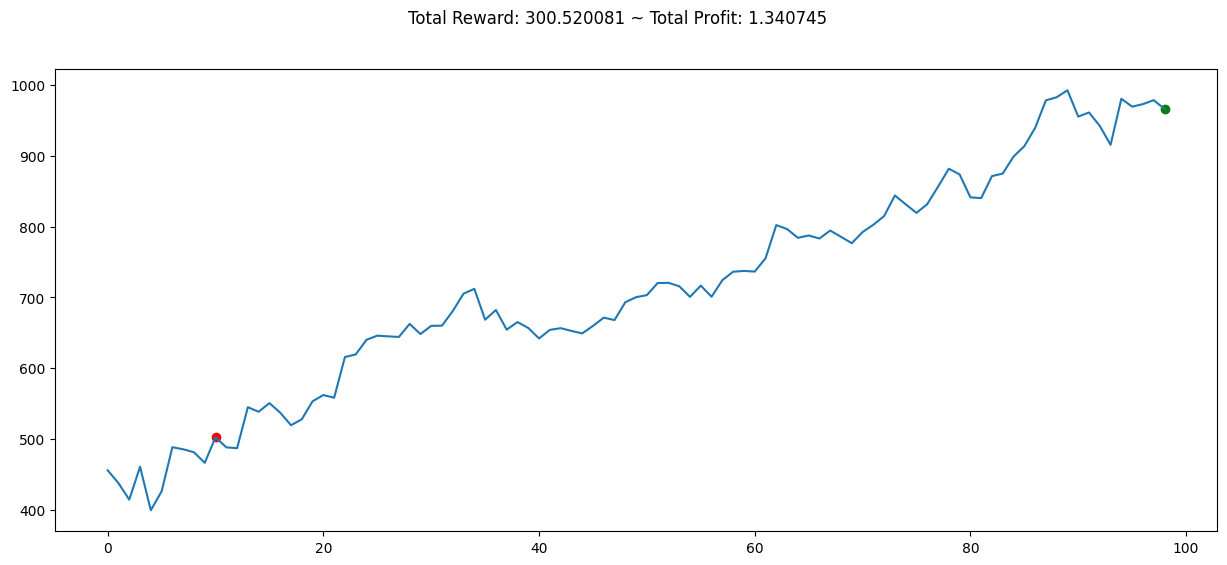

In [ ]:
# Run the agent in the environment
obs, info = env.reset()

while True:
    obs = obs.reshape((10, 2))
    action, _states = model.predict(obs)
    obs, rewards, done, truncated, info = env.step(action)

    if done or truncated:
        print("Final Info:", info)
        break

# ✅ Render AFTER trading, WITHOUT resetting the environment
plt.figure(figsize=(15,6))
plt.cla()
env.render()  # This will now show the actual trades
plt.show()



In [ ]:
import gym
from gym_anytrading.envs import StocksEnv

# Register the environment manually
gym.register(
    id='stocks-v0',
    entry_point='gym_anytrading.envs:StocksEnv',
)


import tensorflow as tf

# In TensorFlow 2.x, eager execution is enabled by default, so no need for tf.enable_eager_execution()
print("Eager execution is enabled:", tf.executing_eagerly())

# Ensure compatibility with Stable-Baselines3
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
import gym
import gym_anytrading
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load dataset
df = pd.read_csv('data/gmedata.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create the trading environment
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)

def visualize_environment(env):
    """Visualize the environment's performance."""
    state = env.reset()
    while True:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        if done:
            print("info", info)
            break

    plt.figure(figsize=(15, 6))
    plt.cla()
    env.render_all()
    plt.show()

# Visualize the environment
visualize_environment(env)

# Use Stable-Baselines3 for the reinforcement learning model
env = make_vec_env(lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5), n_envs=1)

model = A2C('MlpPolicy', env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("a2c_gme_trading")

# Load the model
model = A2C.load("a2c_gme_trading")

# Test the model
env = gym.make('stocks-v0', df=df, frame_bound=(90, 150), window_size=5)
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()
